In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Velocity distribution just after atomization

Analysis output : Velocity distribution for for multiple nozzle configs

In [2]:
def velocity_profile_1(v_z,pos_x):
  x = np.linspace(-0.2,0.2,200)
  y = np.linspace(-0.2,0.2,200)
  [X,Y] = np.meshgrid(x,y)
  sigma1 = 0.005
  sigma2 = 0.010
  Z = 1.5*v_z*np.exp(-((X-pos_x)*(X-pos_x)+Y*Y*25)/(2*sigma1*sigma1)) + 0.5*v_z*np.exp(-((X-pos_x)*(X-pos_x)+Y*Y*25)/(2*sigma2*sigma2))
  return Z

def velocity_distro_1(v_z,n,d,display=True):
  x = np.linspace(-0.2,0.2,200)
  y = np.linspace(-0.2,0.2,200)
  [X,Y] = np.meshgrid(x,y)
  pos = np.linspace(-(n-1)*d/2,(n-1)*d/2,n)
  Z = np.zeros((200,200))
  for i in range(n):
    Z = Z + velocity_profile_1(v_z,pos[i])
  if(display):
    plt.figure(figsize=(10,5))
    plt.contourf(X,Y,Z,cmap="inferno")
    plt.colorbar()
    plt.show()
    print(Z)
  return X,Y,Z

In [3]:
v_z = 95        #    mean velocity at nozzle
n = 2                   #    no. of nozzles
d = 0.030               #    seperation between nozzles

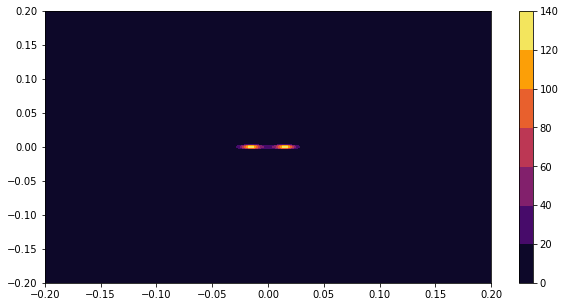

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
_ = velocity_distro_1(v_z,n,d)

## Velocity distribution with distance from wall

In [5]:
def velocity_profile_2(v_z,pos_x,D):
  x = np.linspace(-0.2,0.2,200)
  y = np.linspace(0,D,200)
  [X,Y] = np.meshgrid(x,y)
  K1 = 2.5
  K2 = 1.0
  sigma1 = 0.005*np.maximum(1+(K1*Y/D)**1.5,1+K2*Y/D)
  sigma2 = 0.010*np.maximum(1+(K1*Y/D)**1.5,1+K2*Y/D)
  Z = 1.5*(v_z/np.maximum(1.2*(1+K1*Y/D)**0.2,(1+K1*Y/D)))*np.exp(-(X-pos_x)*(X-pos_x)/(2*(sigma1)**2)) + 0.5*(v_z/np.maximum(1.2,(1+K1*Y/D)))*np.exp(-(X-pos_x)*(X-pos_x)/(2*(sigma2)**2))
  return Z

def velocity_distro_2(v_z,n,d,D,display=True):
  x = np.linspace(-0.2,0.2,200)
  y = np.linspace(0,D,200)
  [X,Y] = np.meshgrid(x,y)
  pos = np.linspace(-(n-1)*d/2,(n-1)*d/2,n)
  Z = np.zeros((200,200))
  for i in range(n):
    Z = Z + velocity_profile_2(v_z,pos[i],D)
  if(display):
    plt.figure(figsize=(10,4))
    plt.contourf(X,Y,Z,cmap="inferno")
    plt.colorbar()
    plt.show()
  return X,Y,Z

In [6]:
v_z = 95        #    mean velocity at nozzle
n = 2                   #    no. of nozzles
d = 0.030             #    seperation between nozzles
D = 0.5                 #    distance from nozzle to wall

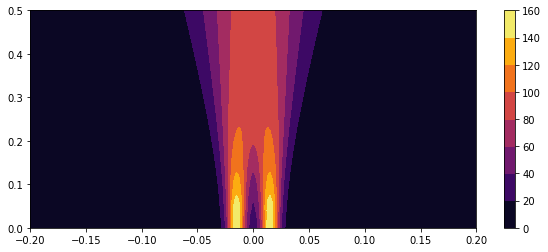

In [7]:
_ = velocity_distro_2(v_z,n,d,D)

## Coating film thickness

Analysis output : Paint thickness at wall for multiple nozzle configs, system configs

In [8]:
def paint_thickness_distro(v_z,n,d,D,v_y,display=True):
  K = 1.0                  # proportionality constant
  X,Y,Z = velocity_distro_2(v_z,n,d,D,display=False)
  v_wall = Z[99,:]
  x_wall = X[99,:]
  thickness = K*v_wall*v_y
  if(display):
    plt.plot(x_wall,v_wall)
    return x_wall,v_wall

In [9]:
v_z = 95           #    mean velocity at nozzle
n_nozzles = [1,2,3,4,5] #    no. of nozzles
d = 0.030              #    seperation between n

v_y = 1                 #    vertical velocity of conveyer belt
D = 0.5                 #    distance between nozzle & wall

Text(0, 0.5, 'thickness')

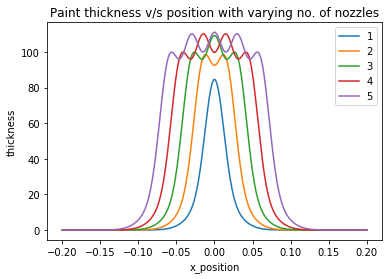

In [10]:
for n in n_nozzles:
  paint_thickness_distro(v_z,n,d,D,v_y)
plt.legend(n_nozzles)
plt.title("Paint thickness v/s position with varying no. of nozzles")
plt.xlabel("x_position")
plt.ylabel("thickness")

Text(0.5, 0, 'Number of nozzles')

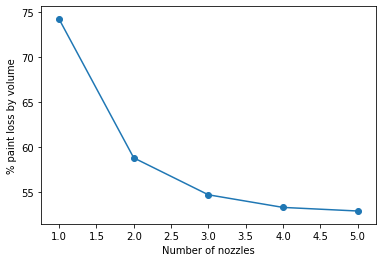

In [11]:
paint_loss = [74.2,58.8,54.7,53.3,52.9]
plt.plot(n_nozzles,paint_loss)
plt.scatter(n_nozzles,paint_loss)
plt.ylabel("% paint loss by volume")
plt.xlabel("Number of nozzles")

Text(0, 0.5, 'thickness')

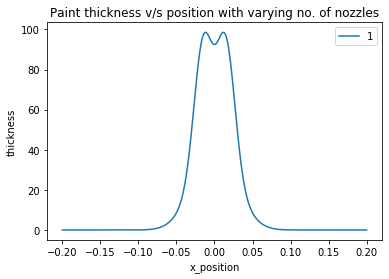

In [12]:
x,v=paint_thickness_distro(v_z,2,d,D,v_y)  #2holes
plt.legend(n_nozzles)
plt.title("Paint thickness v/s position with varying no. of nozzles")
plt.xlabel("x_position")
plt.ylabel("thickness")

In [13]:
print(x,v)

[-0.2        -0.19798995 -0.1959799  -0.19396985 -0.1919598  -0.18994975
 -0.1879397  -0.18592965 -0.1839196  -0.18190955 -0.1798995  -0.17788945
 -0.1758794  -0.17386935 -0.1718593  -0.16984925 -0.1678392  -0.16582915
 -0.1638191  -0.16180905 -0.15979899 -0.15778894 -0.15577889 -0.15376884
 -0.15175879 -0.14974874 -0.14773869 -0.14572864 -0.14371859 -0.14170854
 -0.13969849 -0.13768844 -0.13567839 -0.13366834 -0.13165829 -0.12964824
 -0.12763819 -0.12562814 -0.12361809 -0.12160804 -0.11959799 -0.11758794
 -0.11557789 -0.11356784 -0.11155779 -0.10954774 -0.10753769 -0.10552764
 -0.10351759 -0.10150754 -0.09949749 -0.09748744 -0.09547739 -0.09346734
 -0.09145729 -0.08944724 -0.08743719 -0.08542714 -0.08341709 -0.08140704
 -0.07939698 -0.07738693 -0.07537688 -0.07336683 -0.07135678 -0.06934673
 -0.06733668 -0.06532663 -0.06331658 -0.06130653 -0.05929648 -0.05728643
 -0.05527638 -0.05326633 -0.05125628 -0.04924623 -0.04723618 -0.04522613
 -0.04321608 -0.04120603 -0.03919598 -0.03718593 -0

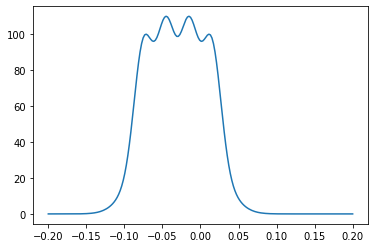

In [14]:
mod_v=[]
ran=30           #8cm
for i in range(len(v)-ran):
    mod_v.append(v[i]+v[i+ran])
for i in range(len(v)-ran,len(v)):
    mod_v.append(v[i])
plt.plot(x,mod_v)


Text(0, 0.5, 'thickness')

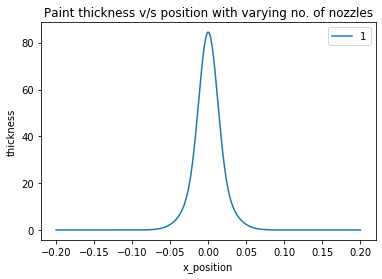

In [15]:
x1,v1=paint_thickness_distro(v_z,1,d,D,v_y)  #1holes
plt.legend(n_nozzles)
plt.title("Paint thickness v/s position with varying no. of nozzles")
plt.xlabel("x_position")
plt.ylabel("thickness")

In [16]:
print(x1,v1)

[-0.2        -0.19798995 -0.1959799  -0.19396985 -0.1919598  -0.18994975
 -0.1879397  -0.18592965 -0.1839196  -0.18190955 -0.1798995  -0.17788945
 -0.1758794  -0.17386935 -0.1718593  -0.16984925 -0.1678392  -0.16582915
 -0.1638191  -0.16180905 -0.15979899 -0.15778894 -0.15577889 -0.15376884
 -0.15175879 -0.14974874 -0.14773869 -0.14572864 -0.14371859 -0.14170854
 -0.13969849 -0.13768844 -0.13567839 -0.13366834 -0.13165829 -0.12964824
 -0.12763819 -0.12562814 -0.12361809 -0.12160804 -0.11959799 -0.11758794
 -0.11557789 -0.11356784 -0.11155779 -0.10954774 -0.10753769 -0.10552764
 -0.10351759 -0.10150754 -0.09949749 -0.09748744 -0.09547739 -0.09346734
 -0.09145729 -0.08944724 -0.08743719 -0.08542714 -0.08341709 -0.08140704
 -0.07939698 -0.07738693 -0.07537688 -0.07336683 -0.07135678 -0.06934673
 -0.06733668 -0.06532663 -0.06331658 -0.06130653 -0.05929648 -0.05728643
 -0.05527638 -0.05326633 -0.05125628 -0.04924623 -0.04723618 -0.04522613
 -0.04321608 -0.04120603 -0.03919598 -0.03718593 -0

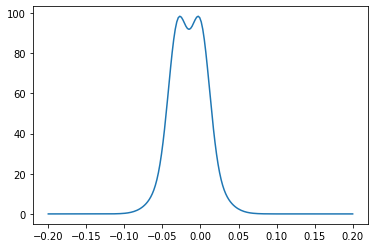

In [17]:
mod_v1=[]
ran=15           #2.9 cm
for i in range(len(v1)-ran):
    mod_v1.append(v1[i]+v1[i+ran])
for i in range(len(v1)-ran,len(v1)):
    mod_v1.append(v1[i])
plt.plot(x,mod_v1)

Text(0, 0.5, 'thickness')

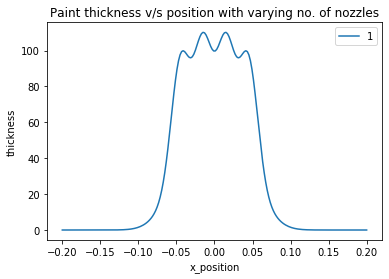

In [18]:
x4,v4=paint_thickness_distro(v_z,4,d,D,v_y)  #4holes
plt.legend(n_nozzles)
plt.title("Paint thickness v/s position with varying no. of nozzles")
plt.xlabel("x_position")
plt.ylabel("thickness")

In [19]:
print(x4,v4)

[-0.2        -0.19798995 -0.1959799  -0.19396985 -0.1919598  -0.18994975
 -0.1879397  -0.18592965 -0.1839196  -0.18190955 -0.1798995  -0.17788945
 -0.1758794  -0.17386935 -0.1718593  -0.16984925 -0.1678392  -0.16582915
 -0.1638191  -0.16180905 -0.15979899 -0.15778894 -0.15577889 -0.15376884
 -0.15175879 -0.14974874 -0.14773869 -0.14572864 -0.14371859 -0.14170854
 -0.13969849 -0.13768844 -0.13567839 -0.13366834 -0.13165829 -0.12964824
 -0.12763819 -0.12562814 -0.12361809 -0.12160804 -0.11959799 -0.11758794
 -0.11557789 -0.11356784 -0.11155779 -0.10954774 -0.10753769 -0.10552764
 -0.10351759 -0.10150754 -0.09949749 -0.09748744 -0.09547739 -0.09346734
 -0.09145729 -0.08944724 -0.08743719 -0.08542714 -0.08341709 -0.08140704
 -0.07939698 -0.07738693 -0.07537688 -0.07336683 -0.07135678 -0.06934673
 -0.06733668 -0.06532663 -0.06331658 -0.06130653 -0.05929648 -0.05728643
 -0.05527638 -0.05326633 -0.05125628 -0.04924623 -0.04723618 -0.04522613
 -0.04321608 -0.04120603 -0.03919598 -0.03718593 -0

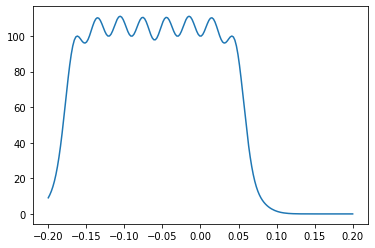

In [20]:
mod_v4=[]
ran=60          #8cm
for i in range(len(v4)-ran):
    mod_v4.append(v4[i]+v4[i+ran])
for i in range(len(v4)-ran,len(v4)):
    mod_v4.append(v4[i])
plt.plot(x,mod_v4)